In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# 1. Nombre minimum de candidats à classer 

On regarde d'abord les données de l'experimentation en ligne Voter Autrement dans laquelle les candidats pouvaient classer des candidats avec la règle de IRV. Dans un cas, il avait obligation de classer au moins 4 candidats, dans l'autre, c'était 1 candidat minimum. Regardons tout d'abord avec le dataset de 2017.

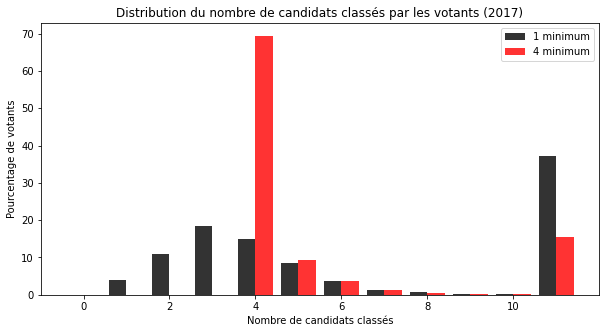

In [56]:
irv_2017_1 = pd.read_csv('../Voter Autrement - 2017 - Online/irv_1.csv')
irv_2017_2 = pd.read_csv('../Voter Autrement - 2017 - Online/irv_2.csv') 

nb_ranked_1 = np.minimum(irv_2017_1.to_numpy()[:,1:],1).sum(axis=1)
distrib_1 = [np.count_nonzero(nb_ranked_1 == i) for i in range(12)]
distrib_1 = 100*np.array(distrib_1)/np.sum(distrib_1)

nb_ranked_2 = np.minimum(irv_2017_2.to_numpy()[:,1:],1).sum(axis=1)
distrib_2 = [np.count_nonzero(nb_ranked_2 == i) for i in range(12)]
distrib_2 = 100*np.array(distrib_2)/np.sum(distrib_2)

plt.figure(figsize=(10,5))
plt.bar([x-0.2 for x  in np.arange(12)], distrib_1, label='1 minimum', width=0.4, color="k", alpha=0.8)
plt.bar([x+0.2 for x  in np.arange(12)], distrib_2, label='4 minimum', width=0.4, color="r", alpha=0.8)
plt.legend()
plt.xlabel('Nombre de candidats classés')
plt.ylabel('Pourcentage de votants')
plt.title('Distribution du nombre de candidats classés par les votants (2017)')
plt.show()

Regardons maintenant avec les données de 2022

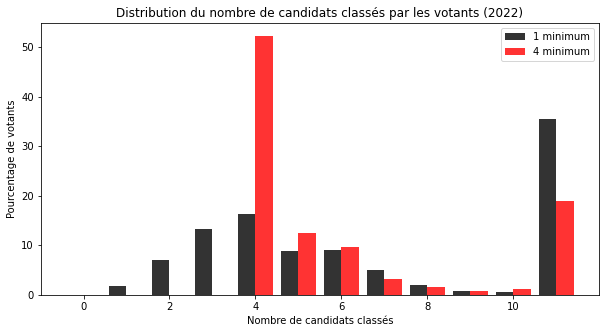

In [57]:
irv_2022_1 = pd.read_csv('../Voter Autrement - 2022 - Online/irv_1.csv')
irv_2022_2 = pd.read_csv('../Voter Autrement - 2022 - Online/irv_2.csv') 

nb_ranked_1 = np.minimum(irv_2022_1.to_numpy()[:,1:],1).sum(axis=1)
distrib_1_bis = [np.count_nonzero(nb_ranked_1 == i) for i in range(12)]
distrib_1_bis = 100*np.array(distrib_1_bis)/np.sum(distrib_1_bis)

nb_ranked_2 = np.minimum(irv_2022_2.to_numpy()[:,1:],1).sum(axis=1)
distrib_2_bis = [np.count_nonzero(nb_ranked_2 == i) for i in range(12)]
distrib_2_bis = 100*np.array(distrib_2_bis)/np.sum(distrib_2_bis)

plt.figure(figsize=(10,5))
plt.bar([x-0.2 for x  in np.arange(12)], distrib_2_bis, label='1 minimum', width=0.4, color="k", alpha=0.8)
plt.bar([x+0.2 for x  in np.arange(12)], distrib_1_bis, label='4 minimum', width=0.4, color="r", alpha=0.8)
plt.legend()
plt.xlabel('Nombre de candidats classés')
plt.ylabel('Pourcentage de votants')
plt.title('Distribution du nombre de candidats classés par les votants (2022)')
plt.show()

Maintenant, on compare tous les datasets

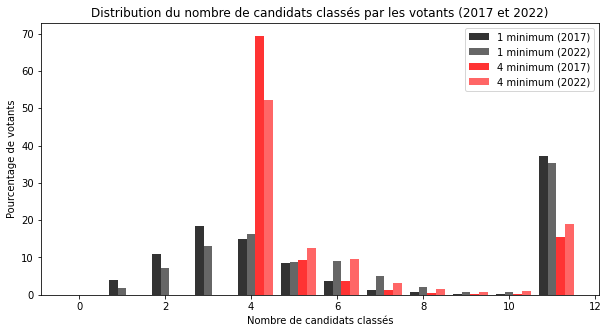

In [58]:
plt.figure(figsize=(10,5))
plt.bar([x-0.2 for x  in np.arange(12)], distrib_1, label='1 minimum (2017)', width=0.2, color="k", alpha=0.8)
plt.bar([x for x  in np.arange(12)], distrib_2_bis, label='1 minimum (2022)', width=0.2, color="k", alpha=0.6)
plt.bar([x+0.2 for x  in np.arange(12)], distrib_2, label='4 minimum (2017)', width=0.2, color="r", alpha=0.8)
plt.bar([x+0.4 for x  in np.arange(12)], distrib_1_bis, label='4 minimum (2022)', width=0.2, color="r", alpha=0.6)
plt.legend()
plt.xlabel('Nombre de candidats classés')
plt.ylabel('Pourcentage de votants')
plt.title('Distribution du nombre de candidats classés par les votants (2017 et 2022)')
plt.show()

Analyse : on constate que si on impose de classer 4 candidats, beaucoup de participants vont en effet classer 4 candidats, mais vont s'arrêter là. Peut être un effet du fait que le bouton "valider" va s'allumer lorsque l'on met le 4e candidat, alors que s'il s'allume après le premier candidat, on peut se dire qu'on a pas encore fini lorsqu'il s'allume, et finalement aller jusqu'au bout.

# 2. Opinion de la règle selon le nombre de candidats à classer

On va reprendre les données de 2017 et essayer de voir, le taux d'opinion positive de IRV selon le nombre de candidats classés

In [61]:
opinions = pd.read_csv('../Voter Autrement - 2017 - Online/opinions.csv')
opinions_2017 = opinions.to_numpy()

dict_opinions = {}

for i in range(opinions_2017.shape[0]):
    op = np.nan 
    if not pd.isna(opinions_2017[i,8]):
        op = opinions_2017[i,8]
    if not pd.isna(opinions_2017[i,7]):
        op = opinions_2017[i,7]

    op_2r = np.nan 
    if not pd.isna(opinions_2017[i,-1]):
        op_2r = opinions_2017[i,-1]
    
    op_avg = 0
    c = 0
    for j in range(1,9):
        if not pd.isna(opinions_2017[i,j]):
            op_avg += opinions_2017[i,j]
            c += 1
    if c > 0:
        op_avg /= c 

    if not pd.isna(op):
        dict_opinions[opinions_2017[i,0]] = {"avg": op_avg, "2r": op_2r, "irv": op}


[37.73087071240106, 51.24884366327475, 58.67944621938233, 61.929595827900904, 64.48275862068965, 63.63636363636363, 66.92307692307692, 70.0, 66.66666666666666, 59.25925925925925, 64.4955300127714]
[28.49604221635884, 24.514338575393154, 21.778487752928648, 16.6883963494133, 17.35632183908046, 17.402597402597404, 18.461538461538463, 8.571428571428571, 16.666666666666664, 22.22222222222222, 21.149425287356323]
[54.089709762532976, 66.69750231267345, 72.20447284345049, 73.59843546284223, 75.05747126436782, 70.64935064935065, 79.23076923076923, 72.85714285714285, 62.5, 62.96296296296296, 71.16219667943807]


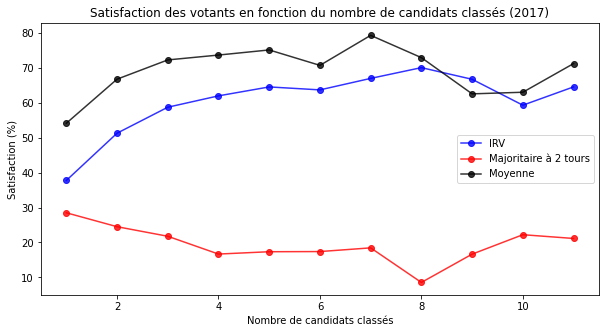

In [75]:
voters_1 = irv_2017_1.to_numpy()

satisfaction_irv_tab_1 = [[] for i in range(12)]
satisfaction_avg_tab_1 = [[] for i in range(12)]
satisfaction_2r_tab_1 = [[] for i in range(12)]

for i in range(voters_1.shape[0]):
    if voters_1[i,0] in dict_opinions:
        opirv = dict_opinions[voters_1[i,0]]['irv']
        op2r = dict_opinions[voters_1[i,0]]['2r']
        avg = dict_opinions[voters_1[i,0]]['avg']
        ranked = np.sum(np.minimum(voters_1[i,1:],1))
        if opirv > 0:
            satisfaction_irv_tab_1[ranked].append(1)
        else:
            satisfaction_irv_tab_1[ranked].append(0)

        if op2r > 0:
            satisfaction_2r_tab_1[ranked].append(1)
        else:
            satisfaction_2r_tab_1[ranked].append(0)
        
        if avg > 0:
            satisfaction_avg_tab_1[ranked].append(1)
        else:
            satisfaction_avg_tab_1[ranked].append(0)

        
    
print([100*np.mean(satisfaction_irv_tab_1[i]) for i in range(1,12)])
print([100*np.mean(satisfaction_2r_tab_1[i]) for i in range(1,12)])
print([100*np.mean(satisfaction_avg_tab_1[i]) for i in range(1,12)])


fig = plt.figure(figsize=(10,5))

plt.plot(range(1,12),[100*np.mean(satisfaction_irv_tab_1[i]) for i in range(1,12)], 'o-', color='b', alpha=0.8, label='IRV')
plt.plot(range(1,12),[100*np.mean(satisfaction_2r_tab_1[i]) for i in range(1,12)], 'o-', color='r', alpha=0.8, label='Majoritaire à 2 tours')
plt.plot(range(1,12),[100*np.mean(satisfaction_avg_tab_1[i]) for i in range(1,12)], 'o-',color='k', alpha=0.8,  label='Moyenne')

plt.legend()
plt.xlabel('Nombre de candidats classés')
plt.ylabel('Satisfaction (%)')
plt.title('Satisfaction des votants en fonction du nombre de candidats classés (2017)')
plt.show()





Analyse : Les participants qui classent peu de candidats sont globalement moins satisfait par IRV et les règles alternatives en generale, et legerement plus satisfait par la règle actuelle. Plus un candidat classe d'alternative, plus IRV semble monter dans son appréciation. Notez tout de même que l'on a très peu de participants qui ont classé 8,9 et 10 alternatives, donc les résultats de cette tranche là sont à considerer avec précaution.

# 3. Note according to the position in the ranking

In [76]:
notes = pd.read_csv('../Voter Autrement - 2017 - Online/notes.csv')
notes_2017 = notes.to_numpy()
dict_notes = {}

for i in range(notes_2017.shape[0]):
    dict_notes[notes_2017[i,0]] = notes_2017[i,1:]

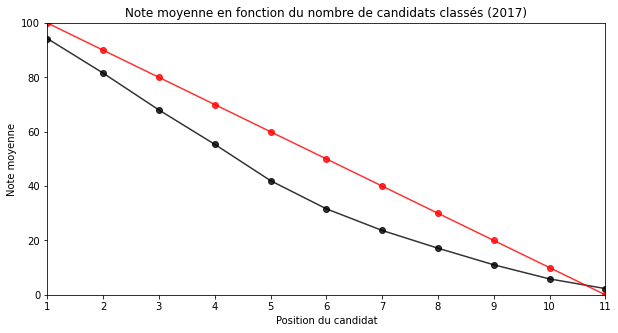

In [84]:
voters_1 = irv_2017_1.to_numpy()

notes_2017_tab = [[] for i in range(11)]

for i in range(voters_1.shape[0]):
    if voters_1[i,0] not in dict_notes:
        continue
    ranked = np.sum(np.minimum(voters_1[i,1:],1))
    if ranked != 11:
        continue 
    for j in range(11):
        if not pd.isna(dict_notes[voters_1[i,0]][j]):
            notes_2017_tab[voters_1[i,1+j]-1].append(dict_notes[voters_1[i,0]][j])

voters_2 = irv_2017_2.to_numpy()

for i in range(voters_2.shape[0]):
    if voters_2[i,0] not in dict_notes:
        continue
    ranked = np.sum(np.minimum(voters_2[i,1:],1))
    if ranked != 11:
        continue 
    for j in range(11):
        if not pd.isna(dict_notes[voters_2[i,0]][j]):
            notes_2017_tab[voters_2[i,1+j]-1].append(dict_notes[voters_2[i,0]][j])


fig = plt.figure(figsize=(10,5))

plt.plot(range(1,12),[np.mean(notes_2017_tab[i]) for i in range(11)], 'o-', color='k', alpha=0.8, label='Average note')
# borda 
plt.plot(range(1,12),np.linspace(100,0,11), 'o-', color='r', alpha=0.8, label='Borda')
plt.xlim(1,11)
plt.ylim(0,100)
plt.xticks(np.arange(1,12), np.arange(1,12))
plt.xlabel('Position du candidat')
plt.ylabel('Note moyenne')
plt.title('Note moyenne en fonction du nombre de candidats classés (2017)')
plt.show()



On remarque que la note moyenne selon la position du candidat suit quasiment une évolution linéaire, proche du vector de Borda, mais un petit peu plus concave. 

Question : est-ce du à l'omniprésence de mélenchoniste ? Observe-ton la même chose avec les supporters d'autres partis ? 